### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Data importing

In [2]:
df=pd.read_csv('cancer patient data sets.csv') 
df=df.drop_duplicates()
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df.isnull().sum().sum()

0

In [4]:
df=df.fillna(0)
#df=df.dropna()

Feature encoding

In [5]:
labelencoder = LabelEncoder()
df['Patient Id'] = labelencoder.fit_transform(df['Patient Id'])

In [6]:
labelencoder = LabelEncoder()
df['Level'] = labelencoder.fit_transform(df['Level'])

In [7]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,0,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,1,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,2,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,0
3,3,3,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,0
4,4,4,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,0


### Separating  the dependent and independent variables

In [8]:
X=df.drop(['chronic Lung Disease','index'],axis=1)
y=df['chronic Lung Disease']

###  Exploratory Data Analysis (EDA) 

1. Checking about null values

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Patient Id                1000 non-null   int32
 1   Age                       1000 non-null   int64
 2   Gender                    1000 non-null   int64
 3   Air Pollution             1000 non-null   int64
 4   Alcohol use               1000 non-null   int64
 5   Dust Allergy              1000 non-null   int64
 6   OccuPational Hazards      1000 non-null   int64
 7   Genetic Risk              1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

2. Class distribution

In [10]:
print("low Class : ",len(df.loc[df['Level'] == 0]))
print("medium Class : ",len(df.loc[df['Level'] == 1]))
print("High Class : ",len(df.loc[df['Level'] == 2]))

low Class :  365
medium Class :  303
High Class :  332


3. Histogram to analyze the range of values in each feature

array([[<Axes: title={'center': 'Patient Id'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Air Pollution'}>,
        <Axes: title={'center': 'Alcohol use'}>],
       [<Axes: title={'center': 'Dust Allergy'}>,
        <Axes: title={'center': 'OccuPational Hazards'}>,
        <Axes: title={'center': 'Genetic Risk'}>,
        <Axes: title={'center': 'Balanced Diet'}>,
        <Axes: title={'center': 'Obesity'}>],
       [<Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'Passive Smoker'}>,
        <Axes: title={'center': 'Chest Pain'}>,
        <Axes: title={'center': 'Coughing of Blood'}>,
        <Axes: title={'center': 'Fatigue'}>],
       [<Axes: title={'center': 'Weight Loss'}>,
        <Axes: title={'center': 'Shortness of Breath'}>,
        <Axes: title={'center': 'Wheezing'}>,
        <Axes: title={'center': 'Swallowing Difficulty'}>,
        <Axes: title={'center': 'Clubbing of Finger Na

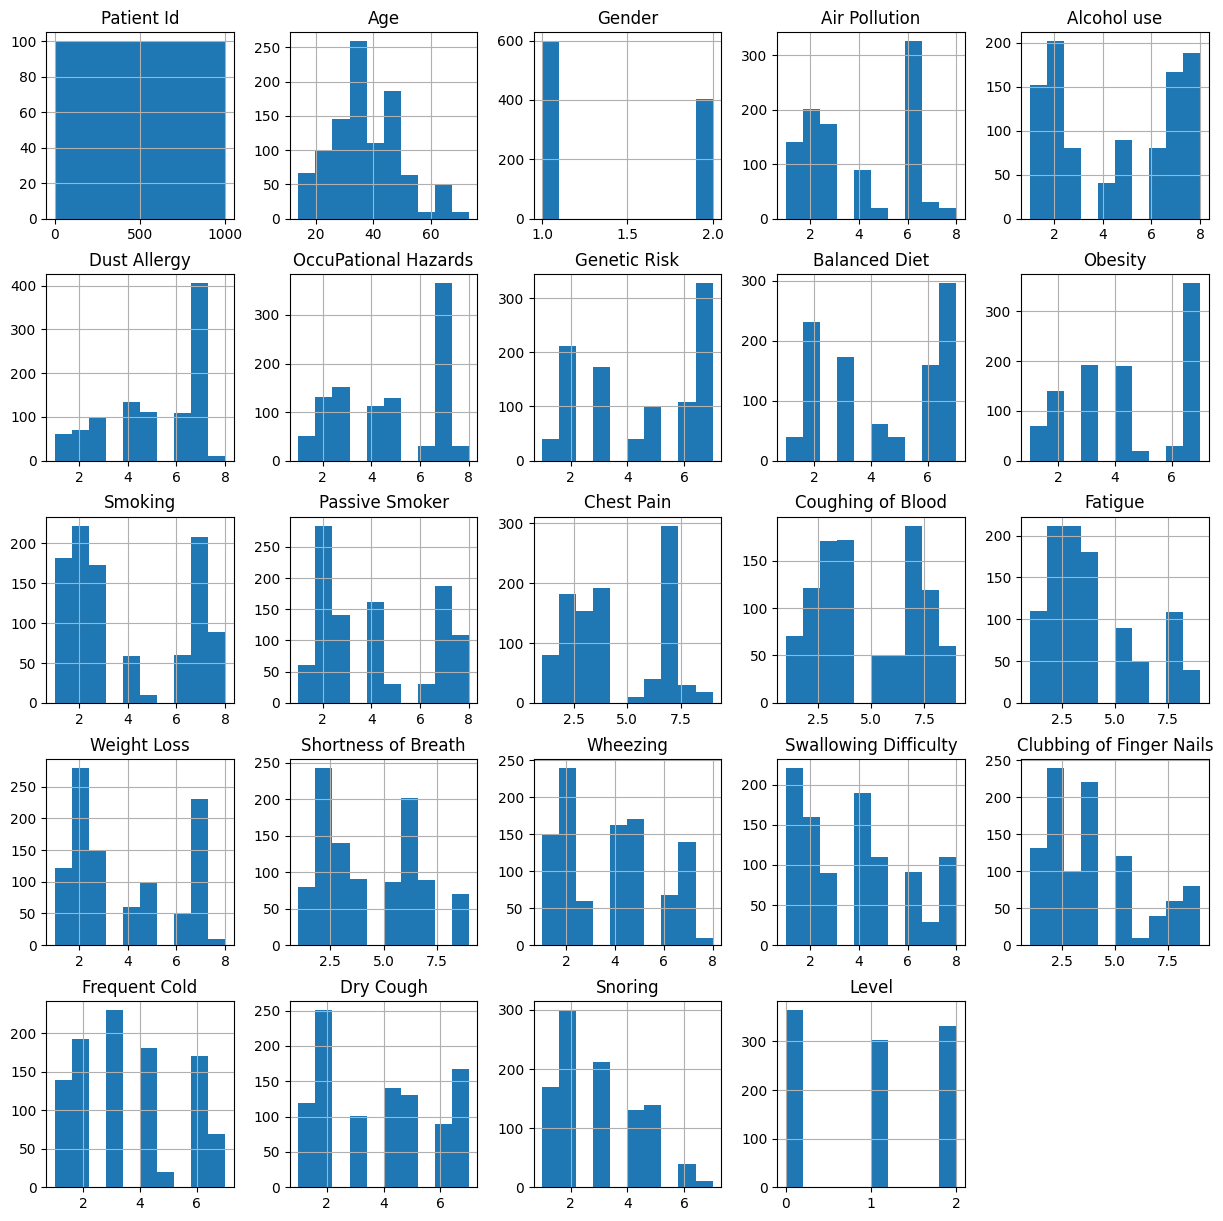

In [11]:
X.hist(figsize=[15,15])

4. Checking values in Sex Feature

In [12]:
print(X['Gender'].value_counts())
#X['F15'].mode()

1    598
2    402
Name: Gender, dtype: int64


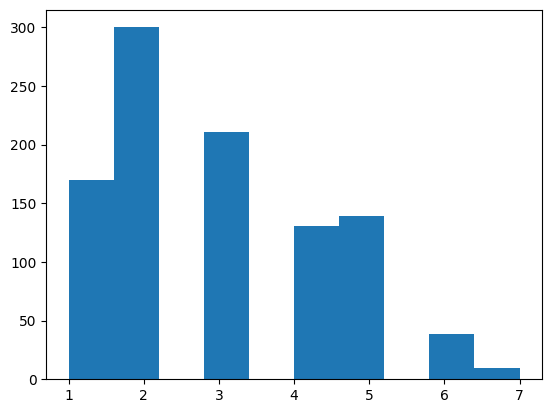

In [13]:
plt.hist(X.Snoring.values)
plt.show()

In [14]:
df.corr().abs()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,1.000000,1.000000,0.002674,0.025739,0.053307,0.041374,0.037960,0.032355,0.030725,0.025177,...,0.042346,0.026393,0.027950,0.015078,0.005573,0.015706,0.045687,0.003793,0.002957,0.024556
Patient Id,1.000000,1.000000,0.002674,0.025739,0.053307,0.041374,0.037960,0.032355,0.030725,0.025177,...,0.042346,0.026393,0.027950,0.015078,0.005573,0.015706,0.045687,0.003793,0.002957,0.024556
Age,0.002674,0.002674,1.000000,0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,...,0.095059,0.106946,0.035329,0.095354,0.105833,0.039258,0.012706,0.012128,0.004700,0.042631
Gender,0.025739,0.025739,0.202086,1.000000,0.246912,0.227636,0.204312,0.192343,0.222727,0.205061,...,0.116467,0.057993,0.045972,0.076304,0.058324,0.034219,0.000526,0.123001,0.181618,0.086222
Air Pollution,0.053307,0.053307,0.099494,0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,...,0.211724,0.258016,0.269558,0.055368,0.080918,0.241065,0.174539,0.261489,0.021343,0.577269
Alcohol use,0.041374,0.041374,0.151742,0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,...,0.237245,0.207851,0.435785,0.180817,0.114073,0.414992,0.180778,0.211277,0.122694,0.434071
Dust Allergy,0.037960,0.037960,0.035202,0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.264926
OccuPational Hazards,0.032355,0.032355,0.062177,0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,...,0.267844,0.176226,0.366482,0.178925,0.002853,0.366447,0.077166,0.159887,0.022916,0.363748
Genetic Risk,0.030725,0.030725,0.073151,0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,...,0.230530,0.271743,0.458200,0.204973,0.062948,0.357815,0.087092,0.194399,0.056831,0.423382
chronic Lung Disease,0.025177,0.025177,0.128952,0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.432405


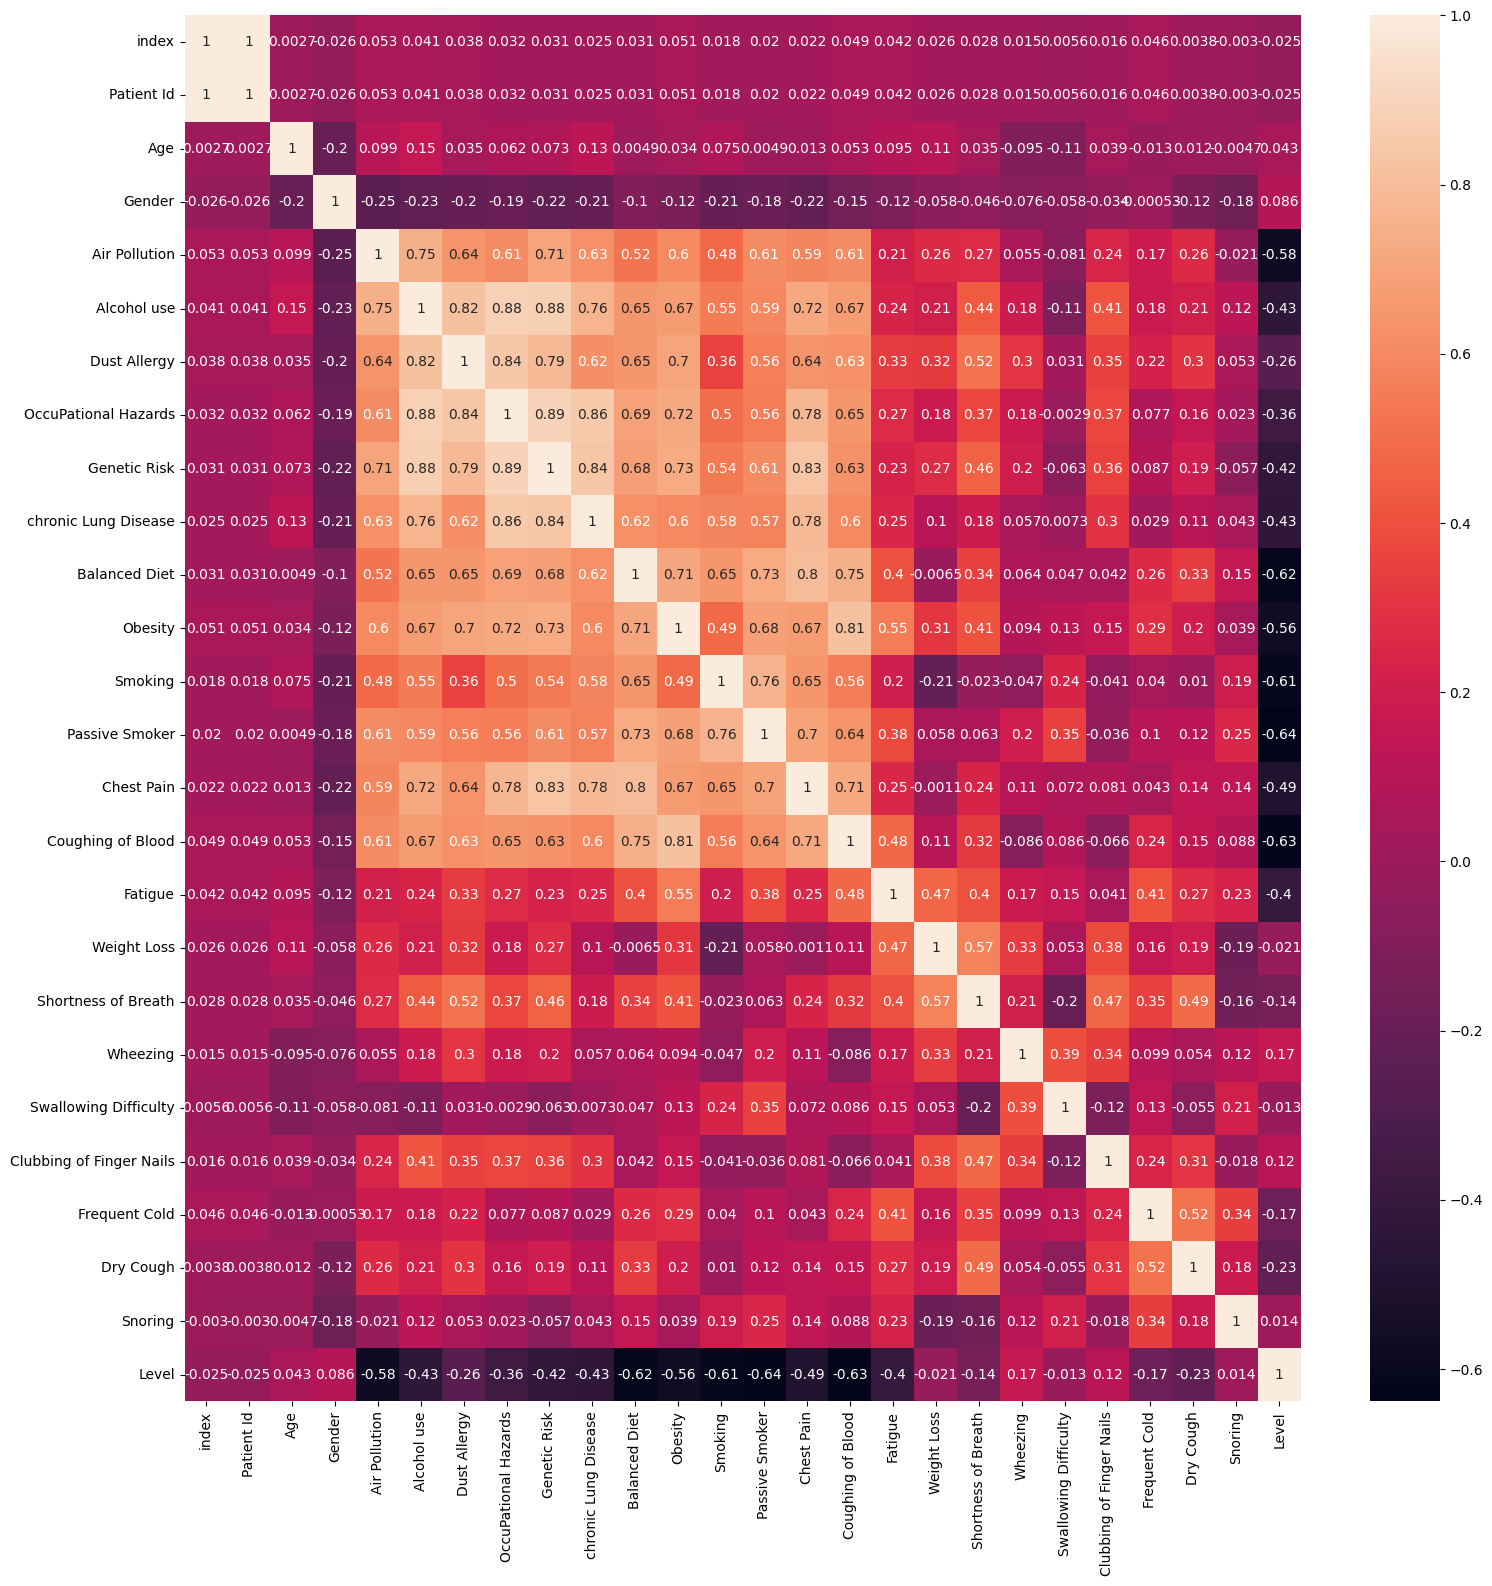

In [15]:
#Filter Method using Pearson Correlation
plt.figure(figsize=(18,18))
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [16]:
X.describe()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.96700
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.83463
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.00000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.00000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.00000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.00000


In [17]:
X.head(3)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,4,...,3,4,2,2,3,1,2,3,4,1
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,2,35,1,4,5,6,5,5,6,7,...,8,7,9,2,1,4,6,7,2,0


In [18]:
X.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'Balanced Diet',
       'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [19]:
cat_cols=X[['Patient Id', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'Balanced Diet',
       'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']]
cat_cols.head()

,Patient Id,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Balanced Diet,Obesity,Smoking,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,1,2,4,5,4,3,2,4,3,...,3,4,2,2,3,1,2,3,4,1
1,1,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,2,1,4,5,6,5,5,6,7,2,...,8,7,9,2,1,4,6,7,2,0
3,3,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,4,1,6,8,7,7,7,7,7,8,...,3,2,4,1,4,2,4,2,3,0


In [20]:
cont_col = X[['Age']]
cont_col.head()

,Age
0,33
1,17
2,35
3,37
4,46


### Find outliers

1. Finding Percentile (25% and 75%)

In [21]:
q1 = cont_col.quantile(0.25)
q3 = cont_col.quantile(0.75)
percentile =pd.DataFrame([q1,q3])
percentile

,Age
0.25,27.75
0.75,45.00


2. Finding interquartile range

In [22]:
iqr = q3 - q1
iqr_df=pd.DataFrame([iqr])
iqr_df

,Age
0,17.25


3. Finding the lower limit and upper limit

In [23]:
lower_lim = q1 - 1.5 * iqr
upper_lim = q3 + 1.5 * iqr

4. Found the lower value and upper value for outlier for each column

In [24]:
lower=pd.DataFrame(lower_lim)
upper=pd.DataFrame(upper_lim)
lower_up = lower.rename(columns = {0:'lower limit'})
upper_up = upper.rename(columns = {0:'upper limit'})
lower_limit_df=lower_up.T
upper_limit_df=upper_up.T
#df_mix_max_limit=lower.append(upper)
df_up=pd.concat([lower_limit_df, upper_limit_df])
df_up

,Age
lower limit,1.875
upper limit,70.875


### Removing the outlier values 

In [25]:
df_without_outlier = cont_col[(cont_col>lower_lim)&(cont_col<upper_lim)]
df_without_outlier

,Age
0,33.0
1,17.0
2,35.0
3,37.0
4,46.0
...,...
995,44.0
996,37.0
997,25.0
998,18.0


The values now contains the Nan values after removing the outliers.


In [26]:
df_without_outlier.isnull().sum()

Age    10
dtype: int64

now we instead of removing these rows we can replace these value with mean of their column. 

In [27]:

#cols=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       #'F12', 'F13', 'F14', 'F15']
#mode = df_without_outlier.filter(cols).mode()

#df_final=df_without_outlier[cols]=df_without_outlier[cols].fillna(mode.iloc[0])

df_final=df_without_outlier.fillna(df_without_outlier.mean())
df_final

,Age
0,33.0
1,17.0
2,35.0
3,37.0
4,46.0
...,...
995,44.0
996,37.0
997,25.0
998,18.0


In [28]:
df_final.isnull().sum()

Age    0
dtype: int64

In [29]:
X = pd.concat([df_final, cat_cols], axis=1)
X.head()

,Age,Patient Id,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33.0,0,1,2,4,5,4,3,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17.0,1,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35.0,2,1,4,5,6,5,5,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37.0,3,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46.0,4,1,6,8,7,7,7,7,7,...,3,2,4,1,4,2,4,2,3,0


### Feature scaling 

In [30]:
import pandas as pd
from sklearn import preprocessing

x1 = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.372549,0.000000,0.0,0.142857,0.428571,0.571429,0.428571,0.333333,0.166667,0.500000,...,0.250,0.428571,0.125,0.142857,0.285714,0.000,0.166667,0.333333,0.500000,0.5
1,0.058824,0.001001,0.0,0.285714,0.000000,0.571429,0.285714,0.500000,0.166667,0.166667,...,0.000,0.285714,0.750,1.000000,0.714286,0.125,0.000000,1.000000,0.166667,1.0
2,0.411765,0.002002,0.0,0.428571,0.571429,0.714286,0.571429,0.666667,0.833333,1.000000,...,0.875,0.857143,1.000,0.142857,0.000000,0.375,0.833333,1.000000,0.166667,0.0
3,0.450980,0.003003,0.0,0.857143,0.857143,0.857143,0.857143,0.833333,1.000000,1.000000,...,0.375,0.142857,0.250,0.000000,0.428571,0.500,0.833333,1.000000,0.666667,0.0
4,0.627451,0.004004,0.0,0.714286,1.000000,0.857143,0.857143,1.000000,1.000000,1.000000,...,0.250,0.142857,0.375,0.000000,0.428571,0.125,0.500000,0.166667,0.333333,0.0


### Splitting

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled.values, y, train_size=0.7,random_state=42)

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,matthews_corrcoef,classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [33]:
lr=LogisticRegression().fit(X_train,y_train)
y_train -= 1
xgb=XGBClassifier().fit(X_train,y_train)
rf=RandomForestClassifier().fit(X_train,y_train)
knn=KNeighborsClassifier().fit(X_train,y_train)
svc=SVC(probability=True).fit(X_train,y_train)
bnb=BernoulliNB().fit(X_train,y_train)

C:\Users\Mathematician\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

# Assuming you have 5 classifiers and their predicted and actual labels as below
y_true = y_test
y_pred_1 = lr.predict(X_test)
y_pred_2 = xgb.predict(X_test)
y_pred_3 = rf.predict(X_test)
y_pred_4 = knn.predict(X_test)
y_pred_5 = svc.predict(X_test)
y_pred_6=bnb.predict(X_test)

preds = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5,y_pred_6]

for i, y_pred in enumerate(preds, 1):
    print("Classifier ", i)
    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print("Accuracy: ", acc)
    
    # Precision
    precision = precision_score(y_true, y_pred, average='macro')
    print("Precision: ", precision)
    
    # Recall
    recall = recall_score(y_true, y_pred, average='macro')
    print("Recall: ", recall)
    
    # F1-score
    f1 = f1_score(y_true, y_pred, average='macro')
    print("F1-score: ", f1)
    
    # MCC
    cm = confusion_matrix(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    print("MCC: ", mcc)
    print("Confusion Matrix : ", cm)
    print("\n")



Classifier  1
Accuracy:  0.91
Precision:  0.8698290598290599
Recall:  0.8628347425339907
F1-score:  0.8637067587172346
MCC:  0.8884595119932182
Confusion Matrix :  [[ 7  0  5  0  0  0  0]
 [ 0 31  7  0  0  0  0]
 [ 0  5 40  0  0  0  0]
 [ 0  0  0 46  0  0  0]
 [ 0  0  0  4 17  0  0]
 [ 6  0  0  0  0 98  0]
 [ 0  0  0  0  0  0 34]]


Classifier  2
Accuracy:  0.0
Precision:  0.0
Recall:  0.0
F1-score:  0.0
MCC:  -0.15199421080464248
Confusion Matrix :  [[  0   0   0   0   0   0   0   0]
 [ 12   0   0   0   0   0   0   0]
 [  0  38   0   0   0   0   0   0]
 [  0   0  45   0   0   0   0   0]
 [  0   0   0  46   0   0   0   0]
 [  0   0   0   0  21   0   0   0]
 [  0   0   0   0   0 104   0   0]
 [  0   0   0   0   0   0  34   0]]


Classifier  3
Accuracy:  0.0
Precision:  0.0
Recall:  0.0
F1-score:  0.0
MCC:  -0.15199421080464248
Confusion Matrix :  [[  0   0   0   0   0   0   0   0]
 [ 12   0   0   0   0   0   0   0]
 [  0  38   0   0   0   0   0   0]
 [  0   0  45   0   0   0   0   0]
 [

C:\Users\Mathematician\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mathematician\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mathematician\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mathematician\anaconda3\lib\site-packages\sklearn\metrics\_classifica